# Graded: x of 40 correct
- [10] Contains correct number of plots (1 pt each, 10 pts total)
- [10] Contains correct layout (1 pt each, 10 pts total)
- [10] Each plot contains correct data (1 pt each, 10 pts total)
- [10] Titles, labels, and axes (1 pt each, 10 pts total)

Comments: 


# Assignment 3: Constructing a visual report with Matplotlib
You are performing an analysis of fuel efficiency in personal vehicles from model years 1970 - 1980. You have extracted the following data in `list` form:
- `all_mpgs`: Fuel economy (miles per gallon) for all selected vehicle models across all years
- `all_weights`: Weights (lbs) for all selected vehicle models across all years
- `unique_model_years`: A list of model years from 1970 to 1980
- `yearly_mean_mpgs`: Average fuel economy (miles per gallon) for vehicles in each model year
- `yearly_mean_horsepower`: Average engine power (horsepower) for vehicles in each model year
- `origins_1970`: The origin for each vehicle from the 1970 model year
- `origins_1980`: The origin for each vehicle from the 1980 model year
- `origin_mean_mpgs`: Average fuel economy (miles per gallon) for vehicles from each origin
- `origin_mean_horsepower`: Average engine power (horsepower) for vehicles from each origin
- `origin_mean_cylinders`: Average number of engine cylinders for vehicles from each origin
- `origin_mean_displacement`: Average cylinder volume (cm^3) for vehicles from each origin
- `origin_mean_weight`: Average weight (lbs) for vehicles from each origin
- `origin_mean_acceleration`: Average acceleration (ft/s^2) for vehicles from each origin

Your task is to create a visual report for these data. You will create a single Matplotlib Figure containing the following subplots:
1. A scatter plot with `all_weights` on the x-axis and `all_mpgs` on the y-axis
2. A line plot with `unique_model_years` with **separate** y-axes for `yearly_mean_mpgs` and `yearly_mean_horsepower`. Include markers for each data point.
3. Two pie charts, one each for the number of models by origin in `origins_1970` and `origins_1980`
4. A series of 6 bar plots with `origin_mean_mpgs`, `origin_mean_horsepower`, `origin_mean_cylinders`, `origin_mean_displacement`, `origin_mean_weight`, and `origin_mean_acceleration` on y-axis, and each should have `unique_origins` on the x-axis.

The subplots should use a layout with 3 rows:
- Row 1, three subplots: Scatter plot (item 1 above), 2 pie charts (item 3)
- Row 2, 1 subplot stretched across the figure: Line plot (item 2)
- Row 3, 6 subplots: 6 bar plots (item 4)

Be sure to give each subplot a title and label the axes with appropriate descriptor and units. You may customize the appearance (colors, marker types, etc.) in any way you think looks appealing
<br />
<br />
The next cell loads the data and should not be changed.

In [1]:
# Do not change this cell
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

data = sns.load_dataset('mpg')

all_mpgs = data['mpg'].to_list()
all_weights = data['weight'].to_list()

unique_model_years = list(data['model_year'].unique())
unique_origins = sorted(list(data['origin'].unique()))

yearly_mean_mpgs = data.groupby('model_year').mean(numeric_only=True)['mpg'].to_list()
yearly_mean_horsepower = data.groupby('model_year').mean(numeric_only=True)['horsepower'].to_list()

origins_1970 = data.loc[data['model_year'] == 70, 'origin']
origins_1980 = data.loc[data['model_year'] == 80, 'origin']

origin_mean_mpgs = data.groupby('origin').mean(numeric_only=True)['mpg'].to_list()
origin_mean_horsepower = data.groupby('origin').mean(numeric_only=True)['horsepower'].to_list()
origin_mean_cylinders = data.groupby('origin').mean(numeric_only=True)['cylinders'].to_list()
origin_mean_displacement = data.groupby('origin').mean(numeric_only=True)['displacement'].to_list()
origin_mean_weight = data.groupby('origin').mean(numeric_only=True)['weight'].to_list()
origin_mean_acceleration = data.groupby('origin').mean(numeric_only=True)['acceleration'].to_list()


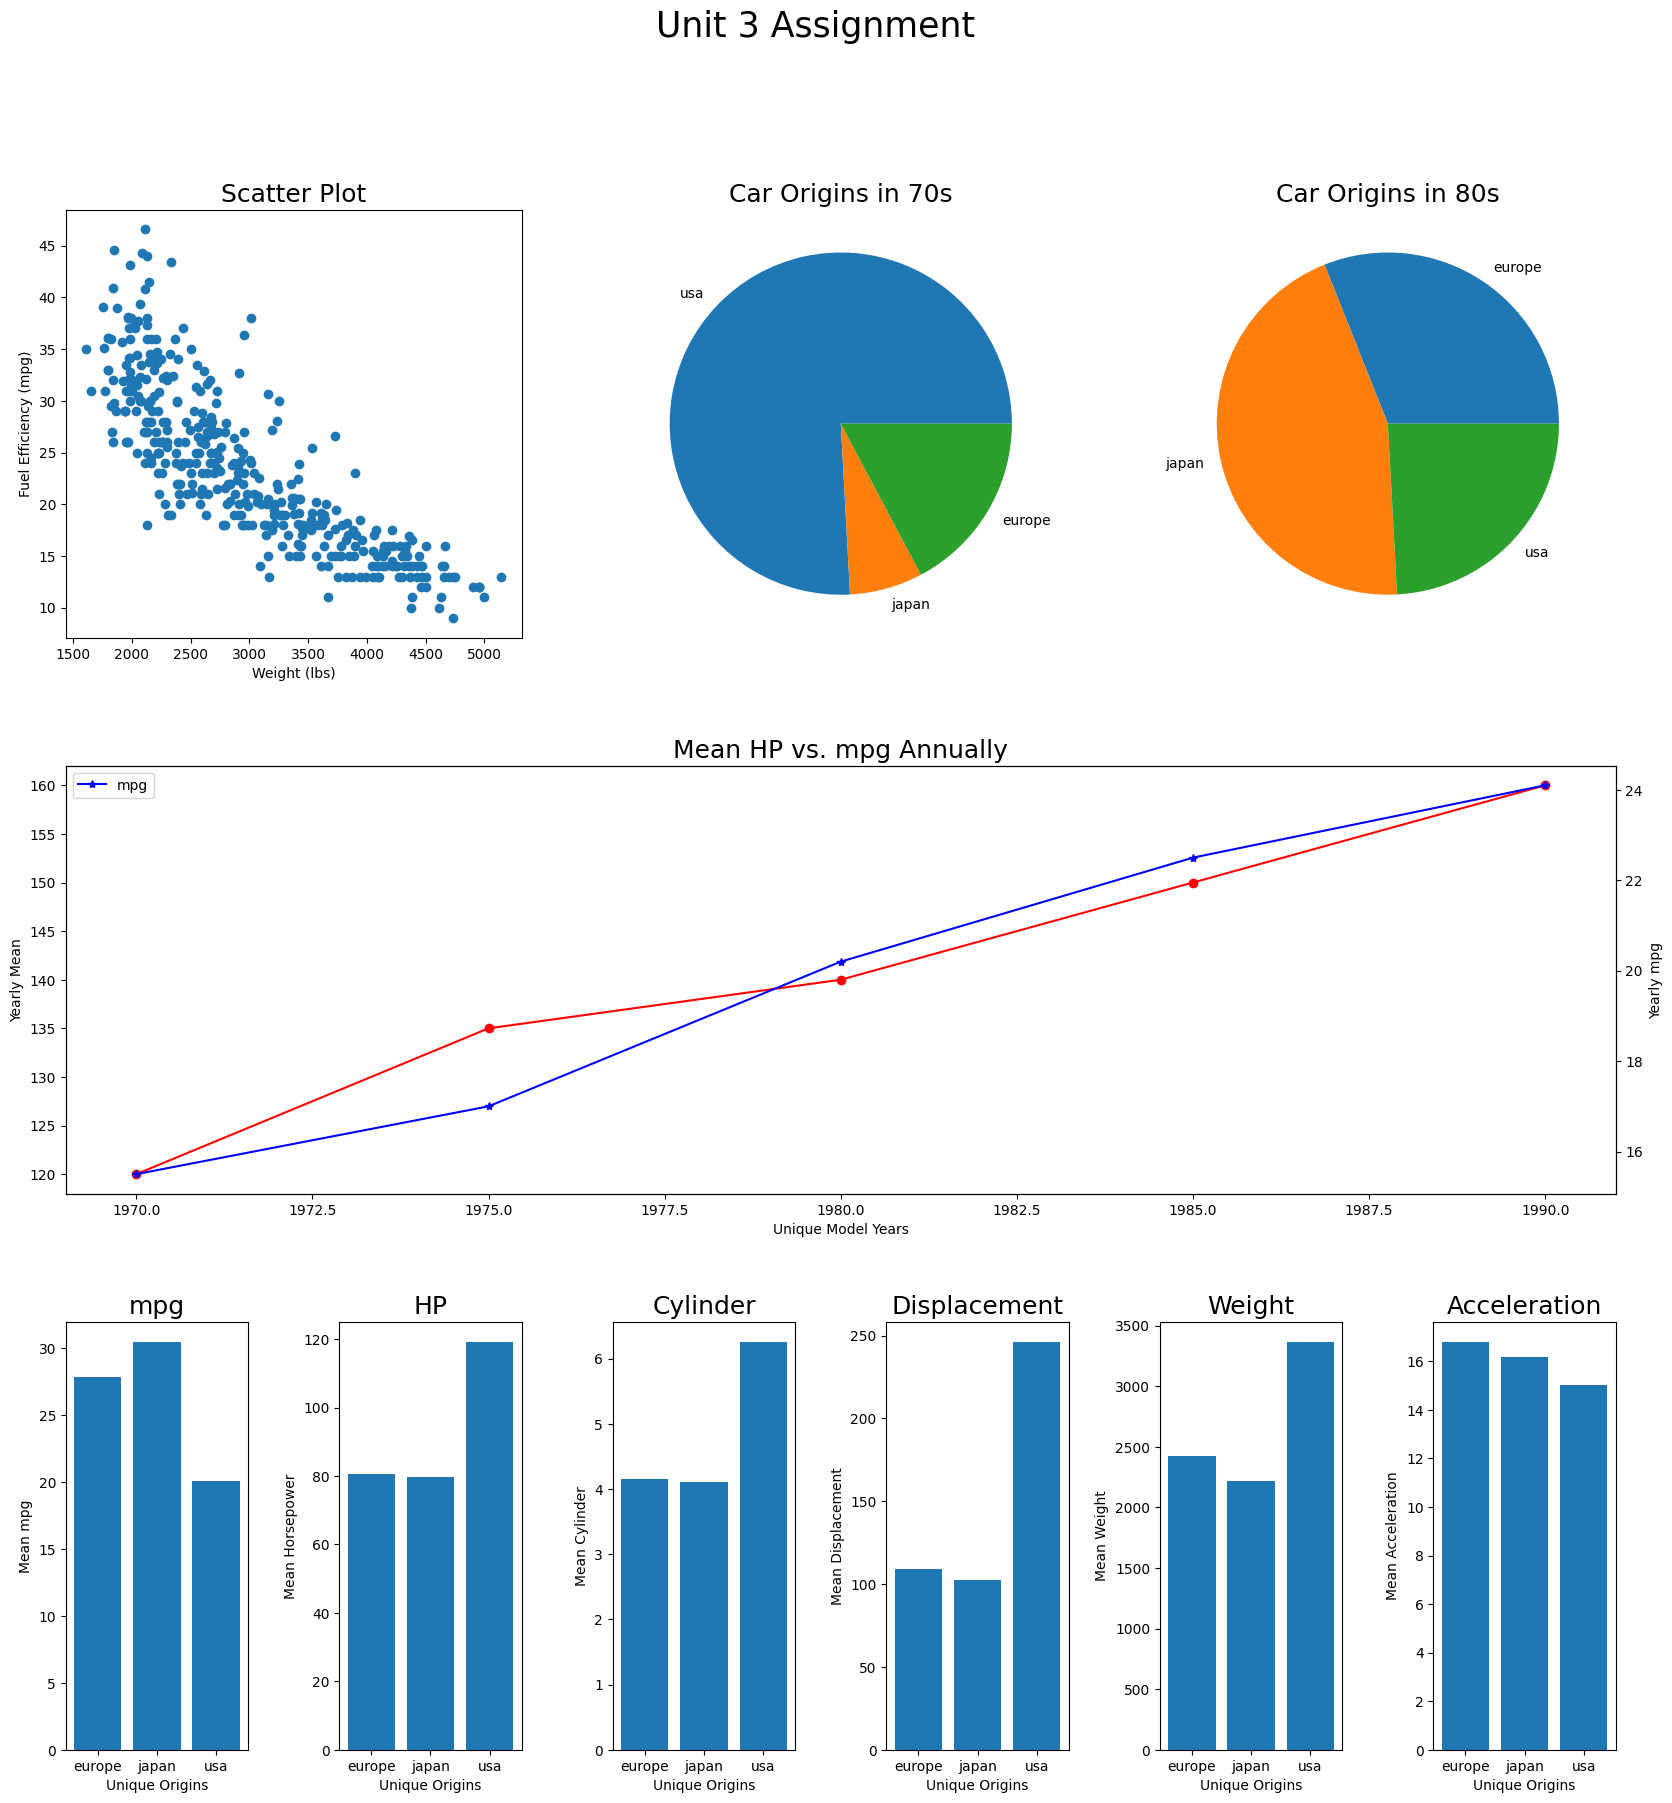

In [8]:

fig = plt.figure(figsize=(20,20))
gs = GridSpec(3, 6, figure=fig, wspace=0.5, hspace=0.3)
fig.suptitle("Unit 3 Assignment", fontsize=25)

# FIRST ROW
row1A = fig.add_subplot(gs[0, 0:2])
row1A.set_xlabel("Weight (lbs)")
row1A.set_ylabel("Fuel Efficiency (mpg)")
row1A.scatter(all_weights, all_mpgs)
row1A.set_title("Scatter Plot", fontsize=18)

row1B = fig.add_subplot(gs[0, 2:4])
car70 = dict()
for car in origins_1970:
    car70[car] = car70.get(car, 0) + 1
car70_label = list(car70.keys())
car70_count = list(car70.values())
row1B.pie(car70_count,  labels=car70_label)
row1B.set_title("Car Origins in 70s", fontsize=18)

row1C = fig.add_subplot(gs[0, 4:6])
car80 = dict()
for car in origins_1980:
    car80[car] = car80.get(car, 0) + 1
car80_label = list(car80.keys())
car80_count = list(car80.values())
row1C.pie(car80_count,  labels=car80_label)
row1C.set_title("Car Origins in 80s", fontsize=18)

# 2ND ROW
row2A = fig.add_subplot(gs[1, :])
row2A.set_xlabel("Unique Model Years")
row2A.set_ylabel("Yearly Mean")
row2A.plot(unique_model_years, yearly_mean_horsepower, color="red", marker="o", label="HP")

row2B = row2A.twinx()
row2B.plot(unique_model_years, yearly_mean_mpgs, color="blue", marker="*", label="mpg")
row2B.set_ylabel("Yearly mpg")
row2B.set_title("Mean HP vs. mpg Annually", fontsize=18)
row2B.legend()

# 3RD ROW
row3A = fig.add_subplot(gs[2, 0:1])
row3A.bar(unique_origins, origin_mean_mpgs)
row3A.set_xlabel("Unique Origins")
row3A.set_ylabel("Mean mpg")
row3A.set_title("mpg", fontsize=18)

row3B = fig.add_subplot(gs[2, 1:2])
row3B.bar(unique_origins, origin_mean_horsepower)
row3B.set_xlabel("Unique Origins")
row3B.set_ylabel("Mean Horsepower")
row3B.set_title("HP", fontsize=18)


row3C = fig.add_subplot(gs[2, 2:3])
row3C.bar(unique_origins, origin_mean_cylinders)
row3C.set_xlabel("Unique Origins")
row3C.set_ylabel("Mean Cylinder")
row3C.set_title("Cylinder", fontsize=18)


row3D = fig.add_subplot(gs[2, 3:4])
row3D.bar(unique_origins, origin_mean_displacement)
row3D.set_xlabel("Unique Origins")
row3D.set_ylabel("Mean Displacement")
row3D.set_title("Displacement", fontsize=18)


row3E = fig.add_subplot(gs[2, 4:5])
row3E.bar(unique_origins, origin_mean_weight)
row3E.set_xlabel("Unique Origins")
row3E.set_ylabel("Mean Weight")
row3E.set_title("Weight", fontsize=18)


row3F = fig.add_subplot(gs[2, 5:6])
row3F.bar(unique_origins, origin_mean_acceleration)
row3F.set_xlabel("Unique Origins")
row3F.set_ylabel("Mean Acceleration")
row3F.set_title("Acceleration", fontsize=18)

plt.show()
